In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/201k-tweets-on-mrmodimrrahulmrkejrielecanal/Narendra Modi_data.csv
/kaggle/input/201k-tweets-on-mrmodimrrahulmrkejrielecanal/Arvind Kejriwal_data.csv
/kaggle/input/201k-tweets-on-mrmodimrrahulmrkejrielecanal/Rahul Gandhi_data.csv


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/201k-tweets-on-mrmodimrrahulmrkejrielecanal/Narendra Modi_data.csv")
df.head()

,Date,User,Tweet,Time
0,2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08
1,2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutio...",23:56:38
2,2022:10:19,mnjworldcom123,Prime Minister Shri Narendra Modi along with H...,23:51:02
3,2022:10:19,BravePedestrian,Bharat Mata has waited 5000 years for a true s...,23:40:58
4,2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti ...,23:34:25


In [4]:
df.shape

(70000, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

In [7]:
def remove_usernames_links(tweet):
    s2 = re.sub('http://\S+|https://\S+', '', tweet)
    s1=re.sub(r"#[a-zA-Z0-9\\n@_\s]+","",s2)
    return s1


In [8]:
def remove_emoji(txt):
    emoji=re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoji, '', txt)

In [9]:
import nltk
from nltk.corpus import stopwords

In [10]:
stp=stopwords.words("english")
print(stp)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
def clean_tweet(tweet):
    link_removed=remove_usernames_links(tweet)
    emoji_removed=remove_emoji(link_removed)
    stopwords_removed=' '.join(words for words in emoji_removed.split() if words not in stp)
    return stopwords_removed

In [12]:
df['Tweet'][1]

'5G About To Bring Major Change, Will Revolutionise Education Sector: PM Narendra Modi\nhttps://t.co/4ceDZIEpkX'

In [13]:
from textblob import TextBlob
from wordcloud import WordCloud
def cal_polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [14]:
def cal_subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

In [15]:
def segmentation(tweet):
    if tweet > 0:
        return 'positive'
    elif tweet == 0 :
        return 'neutral'
    else:
        return 'negative'

In [16]:
df["Cleaned_tweet"]=df["Tweet"].apply(clean_tweet)
df["tPolarity"]=df["Cleaned_tweet"].apply(cal_polarity)
df["tSubjectivity"]=df["Cleaned_tweet"].apply(cal_subjectivity)
df["Segmentation"]=df["tPolarity"].apply(segmentation)

In [17]:
df.head()

,Date,User,Tweet,Time,Cleaned_tweet,tPolarity,tSubjectivity,Segmentation
0,2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08,Is Narendra Modi toaster?,0.0000,0.00,neutral
1,2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutio...",23:56:38,"5G About To Bring Major Change, Will Revolutio...",0.0625,0.50,positive
2,2022:10:19,mnjworldcom123,Prime Minister Shri Narendra Modi along with H...,23:51:02,Prime Minister Shri Narendra Modi along H.E. M...,0.0250,0.25,positive
3,2022:10:19,BravePedestrian,Bharat Mata has waited 5000 years for a true s...,23:40:58,Bharat Mata waited 5000 years true son like Na...,0.3500,0.65,positive
4,2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti ...,23:34:25,How Narendra Modi’s game-changing Gati Shakti ...,0.0000,0.00,neutral


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

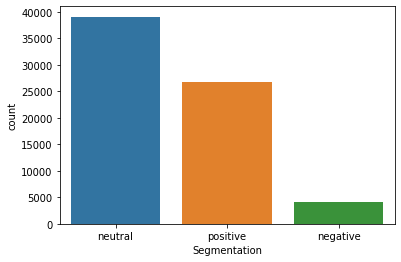

In [18]:
import seaborn as sns
sns.countplot(x="Segmentation",data=df)

In [19]:
Consolidated="".join(words for words in df["Cleaned_tweet"])
word_Cloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(Consolidated)

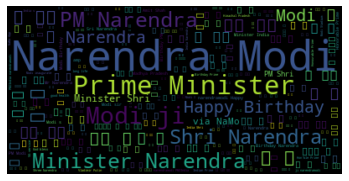

In [20]:
plt.imshow(word_Cloud,interpolation="bilinear")
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='tPolarity', ylabel='tSubjectivity'>

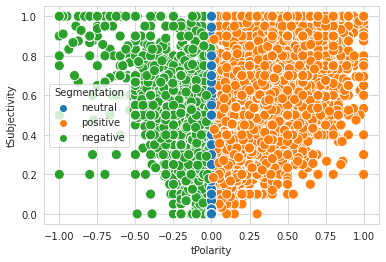

In [21]:
sns.set_style('whitegrid')
sns.scatterplot(data=df,x='tPolarity',y='tSubjectivity',s=100,hue='Segmentation')

OBSERVATION -we can observe that Mr modi has got very less number of -ve feedback but he should focus on neutral ones for better performance in coming election .

# ANALYSIS FOR MR . RAHUL GANDHI

In [22]:
df1=pd.read_csv("/kaggle/input/201k-tweets-on-mrmodimrrahulmrkejrielecanal/Rahul Gandhi_data.csv")
df1.tail()

,Date,User,Tweet,Time
69995,2022:09:24,Dilipmakwana181,@BharatJSoni @dranupmodgil Ye chunawala 2 kodi...,13:39:10
69996,2022:09:24,RoshanKrRaii,Even Rahul Gandhi's fiercest critics like myse...,13:38:21
69997,2022:09:24,NewsShakes,"BHATTACHARJEE SHYAMAL: A "" PSHYCOPATH "" is Rah...",13:38:07
69998,2022:09:24,ayaz_karbelkar,@priyankac19 @MinistryWCD She is cooking 'hate...,13:37:59
69999,2022:09:24,PD75058926,@INCIndia Rahul Gandhi video share karo,13:37:42


In [23]:
df1.shape

(70000, 4)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [25]:
df1.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

In [26]:
df1["Cleaned_tweet"]=df1["Tweet"].apply(clean_tweet)
df1["tPolarity"]=df1["Cleaned_tweet"].apply(cal_polarity)
df1["tSubjectivity"]=df1["Cleaned_tweet"].apply(cal_subjectivity)
df1["Segmentation"]=df1["tPolarity"].apply(segmentation)

In [27]:
df1.head()

,Date,User,Tweet,Time,Cleaned_tweet,tPolarity,tSubjectivity,Segmentation
0,2022:10:19,MdIjran,@JaikyYadav16 इन विकल्पों में से और अभी के समय...,23:55:49,@JaikyYadav16 इन विकल्पों में से और अभी के समय...,0.000,0.00,neutral
1,2022:10:19,28bde43dae3c430,@ndtv Rahul Gandhi left congress in the mid ro...,23:53:30,@ndtv Rahul Gandhi left congress mid road entr...,-0.025,0.15,negative
2,2022:10:19,SkAnzar5,@JaikyYadav16 Rahul Gandhi,23:32:16,@JaikyYadav16 Rahul Gandhi,0.000,0.00,neutral
3,2022:10:19,HariRamDamor2,rahul Gandhi ji is real hero of india.,23:32:09,rahul Gandhi ji real hero india.,0.200,0.30,positive
4,2022:10:19,srinivas_das,Rahul Gandhi is getting massive support in And...,23:21:18,Rahul Gandhi getting massive support Andhra Pr...,0.000,0.50,neutral


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

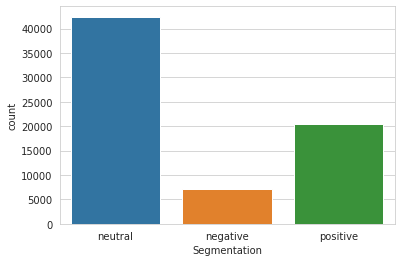

In [28]:
import seaborn as sns
sns.countplot(x="Segmentation",data=df1)

In [29]:
consolidated="".join(words for words in df1["Cleaned_tweet"])
words_Cloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)

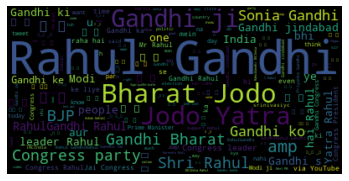

In [30]:
plt.imshow(words_Cloud,interpolation="bilinear")
plt.axis('off')
plt.show()

# WE OBSERVED THAT 'BHARAT JODO YATRA' IS GOING IN FAVOUR OF Mr. GANDHI .BUT WE CAN ALSO SEE 'MODI' IN THAT CLOUD .
# SO PEOPLE ARE ALSO MENTIONING MR. MODIJI WHILE THEY ARE COMMENTING ABOUT Mr. GANDHI .BUT IN PREVIOUS CASE IT WAS NOT HAPPENING .
# WE ARE ALSO GETTING THAT YOU TUBE ALSO HELPING Mr. GANDHI FOR REACHING PEOPLE .

In [31]:
df2=pd.read_csv("/kaggle/input/201k-tweets-on-mrmodimrrahulmrkejrielecanal/Arvind Kejriwal_data.csv")
df2.tail()

,Date,User,Tweet,Time
69995,2022:05:29,milapmann,@BhagwantMann Why giving security to arvind ke...,14:48:52
69996,2022:05:29,Pbx07YT,@aajtak @sambitswaraj Oye bc saleya moosewala ...,14:48:52
69997,2022:05:29,AnmolCh04309319,#Arvind_Kejriwal_should_be_arrested,14:48:50
69998,2022:05:29,republic,#BREAKING | Sidhu Moosewala dead: BJP holds Ar...,14:48:17
69999,2022:05:29,mishrapk1989,"@DChaurasia2312 Dr Kumar Vishwas, former found...",14:47:47


In [32]:
df2.shape

(70000, 4)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [34]:
df2.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

In [35]:
df2["Cleaned_tweet"]=df2["Tweet"].apply(clean_tweet)
df2["tPolarity"]=df2["Cleaned_tweet"].apply(cal_polarity)
df2["tSubjectivity"]=df2["Cleaned_tweet"].apply(cal_subjectivity)
df2["Segmentation"]=df2["tPolarity"].apply(segmentation)

In [36]:
df2.head()

,Date,User,Tweet,Time,Cleaned_tweet,tPolarity,tSubjectivity,Segmentation
0,2022:10:19,bhoo_sene,@TajinderBagga Aap leaders are speaking agains...,23:47:01,@TajinderBagga Aap leaders speaking Hindu gods...,0.266667,0.500000,positive
1,2022:10:19,Madhusu88858324,Bjp Aap se sikh rhi h\nNarendra Modi Manish Si...,23:06:35,Bjp Aap se sikh rhi h Narendra Modi Manish Sis...,0.000000,0.000000,neutral
2,2022:10:19,PremshilaKumarp,@JaikyYadav16 Arvind kejriwal,22:56:42,@JaikyYadav16 Arvind kejriwal,0.000000,0.000000,neutral
3,2022:10:19,lifebecom,Arvind Kejriwal As PM Visits Gujarat School ht...,22:20:51,Arvind Kejriwal As PM Visits Gujarat School,0.000000,0.000000,neutral
4,2022:10:19,sphavisha,Arvind Kejriwal's stand against rape is very c...,22:20:16,Arvind Kejriwal's stand rape clear. This state...,-0.250000,0.641667,negative


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

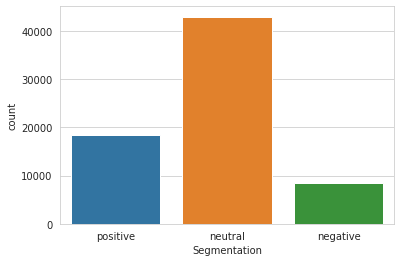

In [37]:
import seaborn as sns
sns.countplot(x="Segmentation",data=df2)

In [38]:
consolidates="".join(words for words in df2["Cleaned_tweet"])
words_Clouds=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidates)

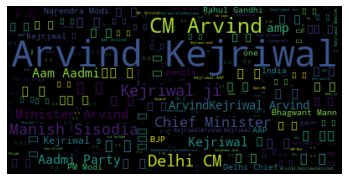

In [39]:
plt.imshow(words_Clouds,interpolation="bilinear")
plt.axis('off')
plt.show()